# K-means clustering - 행정동 군집화
- 스케일링 수행 안함

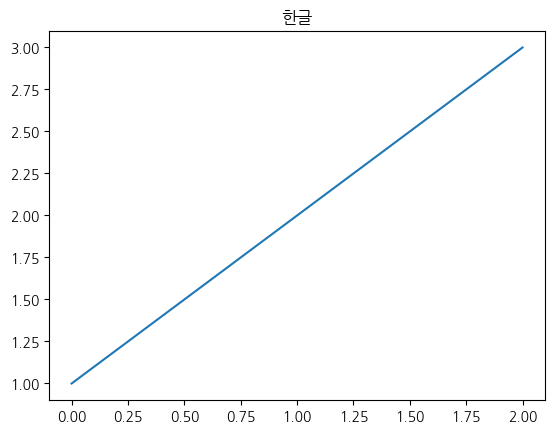

In [1]:
import pandas as pd
import plotly.express as px

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import geopandas as gpd

import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [2]:
df = pd.read_csv('./for_k_means.csv')
df.columns

Index(['자치구', 'PET 총량', 'PET 량(공공처리)', 'PET 량(위탁)', 'CAN 총량', 'CAN 량(공공처리)',
       'CAN 량(위탁)', '구별_총생활인구수_평균', '구별_연령대0_생활인구_평균', '구별_연령대10_생활인구_평균',
       '구별_연령대20_생활인구_평균', '구별_연령대30_생활인구_평균', '구별_연령대40_생활인구_평균',
       '구별_연령대50_생활인구_평균', '구별_연령대60_생활인구_평균', '구별_연령대70_생활인구_평균', '1인가구',
       '2인가구', '3인가구', '4인가구', '5인가구', '6인가구', '7인 이상 가구', '유흥주점영업', '단란주점',
       '제과점영업', '집단급식소', '일반음식점', '휴게음식점', '구별_연령대_100_거주인구_평균',
       '구별_연령대0_거주인구_평균', '구별_연령대10_거주인구_평균', '구별_연령대20_거주인구_평균',
       '구별_연령대30_거주인구_평균', '구별_연령대40_거주인구_평균', '구별_연령대50_거주인구_평균',
       '구별_연령대60_거주인구_평균', '구별_연령대70_거주인구_평균', '구별_연령대80_거주인구_평균',
       '구별_연령대90_거주인구_평균', '수거함개수', '투명', '캔 & 투명', '1인가구_비율', '수거함당_평균_거주인구수',
       '구별_연령대_거주인구_평균_합'],
      dtype='object')

## 엘보우 & 실루엣을 확인하여 k 값 선정

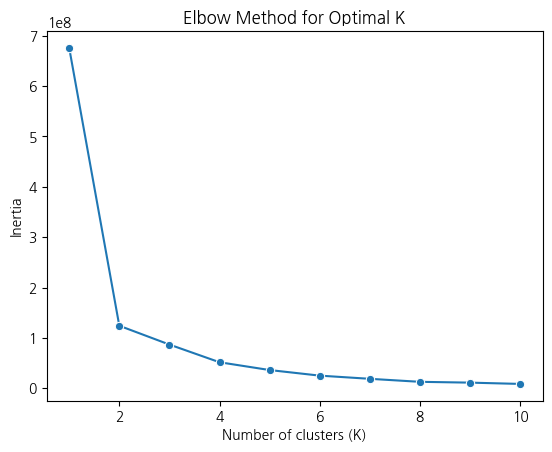

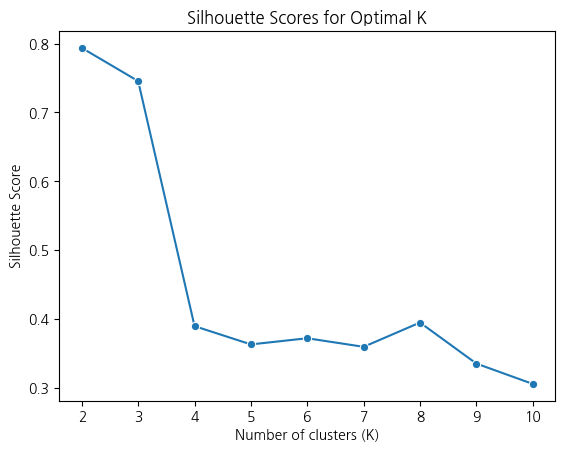

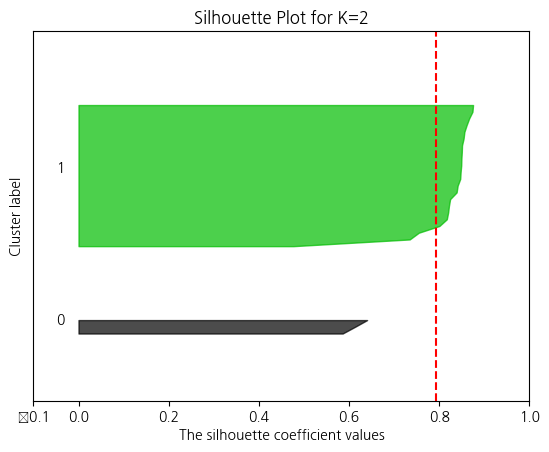

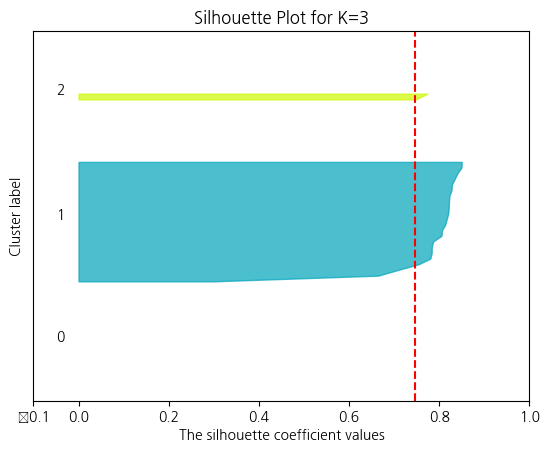

----------------------------------------------- 군집결과 -----------------------------------------------
----------------------------------------------------------------------------------------------------


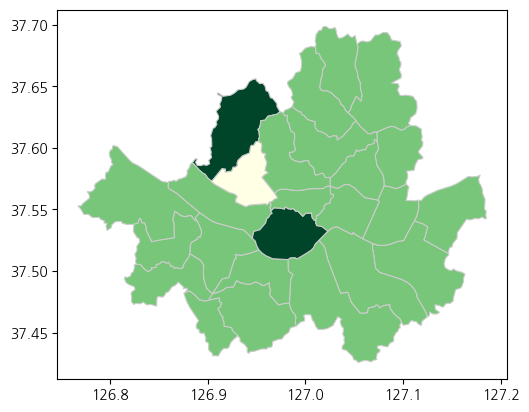

----------------------------------------------------------------------------------------------------
1    22
2     2
0     1
Name: 군집화_결과, dtype: int64


In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./for_k_means.csv')

# Define a function to visualize silhouette scores
def visualize_silhouette(X, cluster_labels):
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    
    fig, ax1 = plt.subplots()
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (k + 1) * 10])
    
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Select columns for clustering
selected_cols = ['PET 총량', '1인가구', '수거함당_평균_거주인구수']

X = df[selected_cols]

# K values range
k_range = range(1, 11)

# Inertia
inertia = []

# Silhouette scores
silhouette_scores = []

# K-means clustering
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

    if k > 1:  # Silhouette score is not defined for a single cluster
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

# Elbow
fig, ax = plt.subplots()
sns.lineplot(x=k_range, y=inertia, marker='o', ax=ax)
ax.set(xlabel='Number of clusters (K)', ylabel='Inertia', title='Elbow Method for Optimal K')
plt.show()

# Silhouette scores plot
fig, ax = plt.subplots()
sns.lineplot(x=k_range[1:], y=silhouette_scores, marker='o', ax=ax)
ax.set(xlabel='Number of clusters (K)', ylabel='Silhouette Score', title='Silhouette Scores for Optimal K')
plt.show()

# Visualize silhouette scores for k=2 and k=3
for k in [2, 3]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    visualize_silhouette(X, cluster_labels)
    plt.title(f'Silhouette Plot for K={k}')
    plt.show()
    
    
print(' 군집결과 '.center(100, '-'))
print('------'.center(100, '-'))
    
import geopandas as gpd

state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
gdf = gpd.read_file(state_geo)
# gdf.head()

# 군집에 쓸 변수
# selected_cols = ['PET 총량', '수거함개수', '1인가구_비율','수거함당_평균_거주인구수']
for_cluster = df[selected_cols]

# k값 설정
k = 3
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(for_cluster)

for_cluster['군집화_결과'] = kmeans.labels_

# 구
gu = df[['자치구']]

# 군집화 결과+구
cluster_df = pd.concat([for_cluster, gu], axis = 1)

# 군집화 결과 시각화
cluster_map = gdf.merge(cluster_df, left_on='name', right_on='자치구')
cluster_map.plot(column='군집화_결과', cmap='YlGn', linewidth=0.8, edgecolor='0.8')
ax.set_title("자치구 군집 결과", fontsize=10)  # 그래프 제목 설정

# 그래프 표시
plt.show()

print('------'.center(100, '-'))
print(cluster_df['군집화_결과'].value_counts())

In [4]:
cluster_df.head()

,PET 총량,1인가구,수거함당_평균_거주인구수,군집화_결과,자치구
0,738.6,1528.411765,956.259655,1,종로구
1,712.8,1521.200000,1174.990476,1,중구
2,973.0,2305.062500,14136.437500,2,용산구
3,1671.3,2505.000000,1700.797861,1,성동구
4,1315.5,4153.400000,3260.165368,1,광진구


## 군집 별 특징 확인(시각화)

In [5]:
cluster0 = cluster_df[cluster_df['군집화_결과'] == 0]
cluster1 = cluster_df[cluster_df['군집화_결과'] == 1]
cluster2 = cluster_df[cluster_df['군집화_결과'] == 2]

cluster0

,PET 총량,1인가구,수거함당_평균_거주인구수,군집화_결과,자치구
12,1412.1,3561.642857,21953.344156,0,서대문구


- PET 총량 > 평균
- 1인가구 > 평균
- 구별_총생활인구수_평균 > 평균
- 수거함당_평균_거주인구수 > 평균

In [7]:
# 군집 별 컬럼별 평균 값을 저장할 데이터프레임 초기화
results_df = pd.DataFrame(columns=['군집', '컬럼', '평균값'])

cols = ['PET 총량', '1인가구', '수거함당_평균_거주인구수']

# 군집 별 컬럼별 평균 계산 및 데이터프레임에 추가
for cluster in cluster_df['군집화_결과'].unique():
    cluster_data = cluster_df[cluster_df['군집화_결과'] == cluster]
    for col in cols:
        mean_value = cluster_data[col].mean()
        results_df = results_df.append({'군집': cluster, '컬럼': col, '평균값': mean_value}, ignore_index=True)
        
results_df

,군집,컬럼,평균값
0,1,PET 총량,1595.313636
1,1,1인가구,3300.245672
2,1,수거함당_평균_거주인구수,2525.137227
3,2,PET 총량,1471.600000
4,2,1인가구,2960.437500
5,2,수거함당_평균_거주인구수,14492.286932
6,0,PET 총량,1412.100000
7,0,1인가구,3561.642857
8,0,수거함당_평균_거주인구수,21953.344156


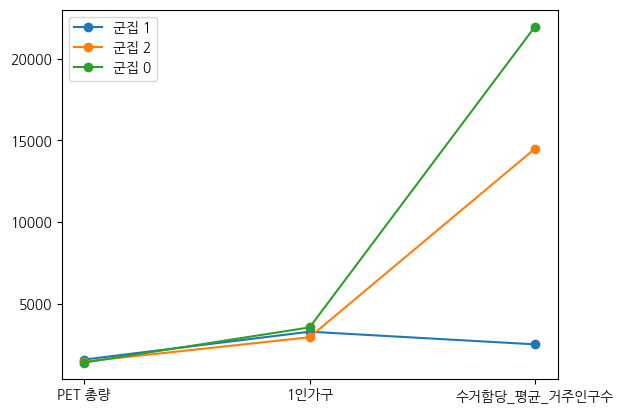

In [8]:
for cluster in results_df['군집'].unique():
    cluster_data = results_df[results_df['군집'] == cluster]
    plt.plot(cluster_data['컬럼'], cluster_data['평균값'], label=f'군집 {cluster}', marker = 'o')

plt.legend()
plt.show()

In [9]:
group01 = cluster_df.groupby('군집화_결과').mean().reset_index()
group01.columns

Index(['군집화_결과', 'PET 총량', '1인가구', '수거함당_평균_거주인구수'], dtype='object')

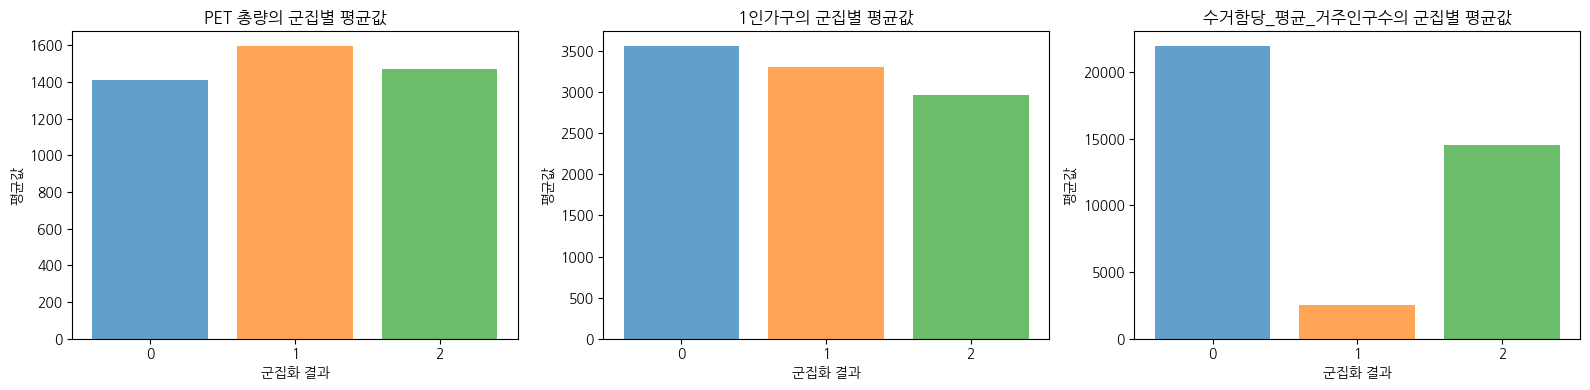

In [10]:
# 4개의 그래프를 가로로 배열하여 그리기
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

columns = ['PET 총량', '1인가구', '수거함당_평균_거주인구수']

for i, col in enumerate(columns):
    for cluster in group01['군집화_결과'].unique():
        cluster_data = group01[group01['군집화_결과'] == cluster]
        axes[i].bar(cluster, cluster_data[col].iloc[0], label=f'군집 {cluster}', alpha=0.7)

    axes[i].set_title(f'{col}의 군집별 평균값')
    axes[i].set_xlabel('군집화 결과')
    axes[i].set_ylabel('평균값')
    axes[i].set_xticks(group01['군집화_결과'].unique())
    # axes[i].legend(title='군집')

plt.tight_layout()
plt.show()

## 군집0과 군집1,2 비교 분석

In [11]:
# 수거함수, pet 총량
cluster_gu = cluster_df[['군집화_결과', '자치구']]
cluster_gu_df = cluster_gu.merge(df, how='left', on='자치구')
cluster_gu_0 = cluster_gu_df[cluster_gu_df['군집화_결과']==0]
cluster_gu_12 = cluster_gu_df[cluster_gu_df['군집화_결과'].isin([1, 2])]

features = ['PET 총량', '수거함개수', '수거함당_평균_거주인구수']
cluster_gu_0[features].mean()
cluster_gu_12[features].mean()

means_df = pd.DataFrame({'cluster0_means': cluster_gu_0[features].mean(), 'cluster12_means': cluster_gu_12[features].mean()})
means_df

,cluster0_means,cluster12_means
PET 총량,1412.100000,1585.004167
수거함개수,1.000000,10.708333
수거함당_평균_거주인구수,21953.344156,3522.399703


## 군집 변수 상관분석

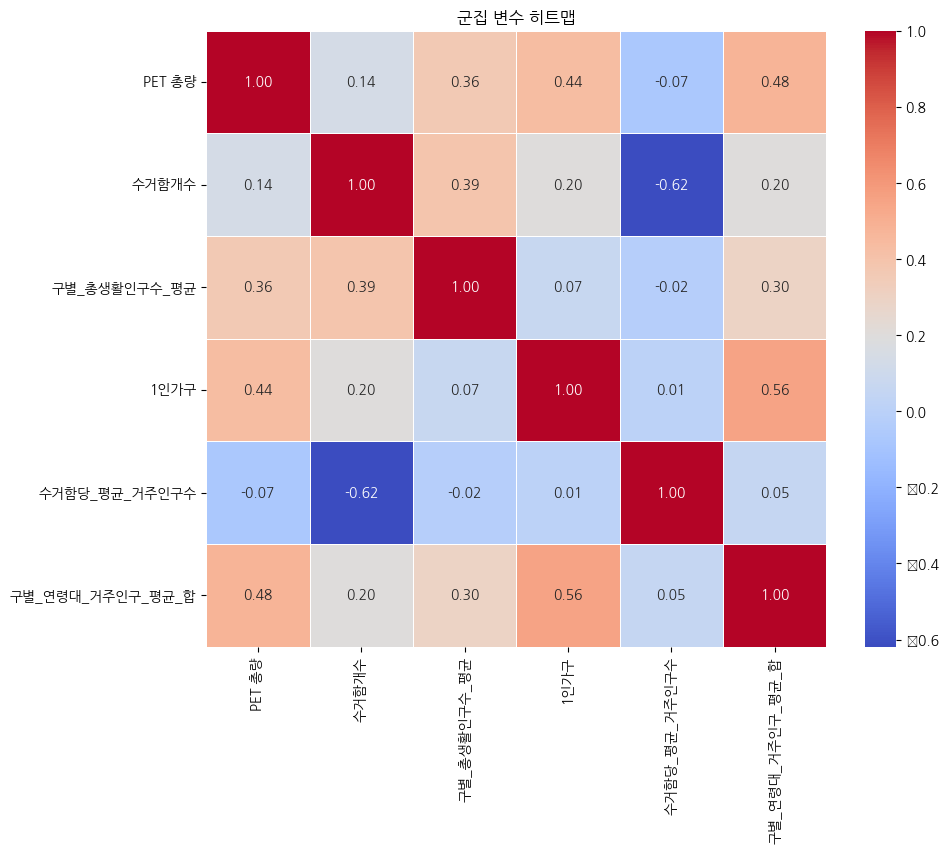

In [12]:
# 히트맵 변수 선택
selected_cols = ['PET 총량', '수거함개수', '구별_총생활인구수_평균', '1인가구', '수거함당_평균_거주인구수',
       '구별_연령대_거주인구_평균_합']
df = df[selected_cols]

# 상관관계 계산
correlation_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('군집 변수 히트맵')
plt.show()